In [2]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_data
from core.utils import Mask
    
import numpy as np
import matplotlib.pyplot as plt


DATA_DIR = r".\imgs"

img = load_data(DATA_DIR)[0] / 255

plt.imshow(img, cmap='gray')

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [5]:
! dir .\imgs

 El volumen de la unidad G es Google Drive
 El n�mero de serie del volumen es: 1983-1116

 Directorio de G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion\imgs

07/10/2021  10:39 a.�m.    <DIR>          .
07/10/2021  10:45 a.�m.    <DIR>          ..
07/10/2021  10:39 a.�m.           298.194 1.gif
07/10/2021  10:39 a.�m.           298.097 10.gif
07/10/2021  10:39 a.�m.           298.146 11.gif
07/10/2021  10:39 a.�m.           298.146 12.gif
07/10/2021  10:39 a.�m.           298.097 13.gif
07/10/2021  10:39 a.�m.           298.097 14.gif
07/10/2021  10:39 a.�m.           298.097 15.gif
07/10/2021  10:39 a.�m.           298.146 16.gif
07/10/2021  10:39 a.�m.           298.097 17.gif
07/10/2021  10:39 a.�m.           298.097 18.gif
07/10/2021  10:39 a.�m.           298.097 19.gif
07/10/2021  10:39 a.�m.           298.185 2.gif
07/10/2021  10:39 a.�m.           298.097 20.gif
07/10/2021  10:39 a.�m.           298.097 21.gif
07/10/2021  10:39 a.�m.           298.097 22.gif
07/10/2021 

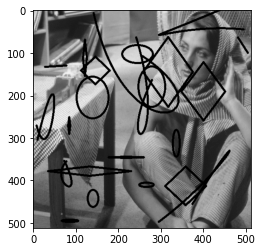

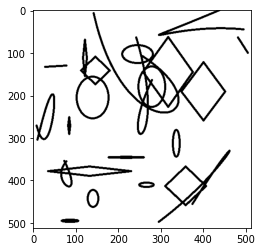

In [ ]:
MODE = "irregular"
mask = Mask(mode=MODE, prcnt=0.5)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

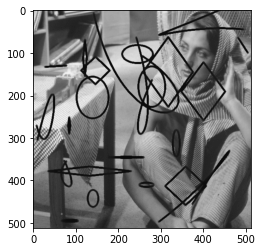

In [ ]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=np.std(mask), stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

plt.imshow(denoised*(1-mask)+ corrupted, cmap='gray')

iteration 1 | error 89.57 | psnr 0.64 | ssim <function structural_similarity at 0x000001D97709B700>


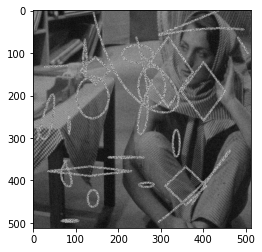

KeyboardInterrupt: 

In [ ]:
from core.admm import ADMM


admm = ADMM()

    
estimated = admm.restore(corrupted, mask, sol=img, iters=30)


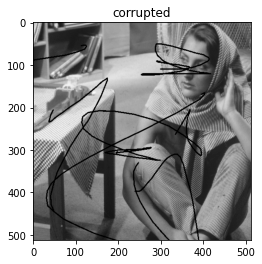

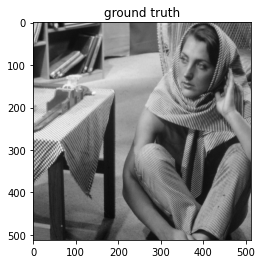

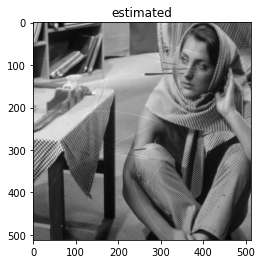

In [ ]:
plt.title("corrupted")
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.title("ground truth")
plt.imshow(img, cmap='gray')
plt.show()


plt.title("estimated")
plt.imshow(estimated, cmap='gray')
plt.show()

In [ ]:
# ! pip install bm3d
# ! pip install scikit-image